In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('/content/50_Startups.csv')

In [4]:
df.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,108.000000,108.000000,108.000000,108,108.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,39,NaN
mean,74959.338704,121750.788889,214952.664722,NaN,113523.760000
std,44996.368152,27322.385654,117937.942120,NaN,38991.013654
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,38558.510000,105077.645000,134050.070000,NaN,90708.190000
50%,75791.365000,122699.795000,239452.750000,NaN,109543.120000
75%,101913.080000,145077.580000,298664.470000,NaN,141585.520000


In [6]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        108 non-null    float64
 1   Administration   108 non-null    float64
 2   Marketing Spend  108 non-null    float64
 3   State            108 non-null    object 
 4   Profit           108 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.3+ KB


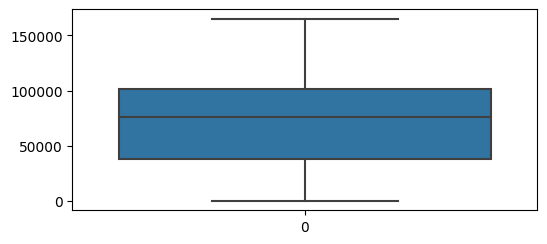

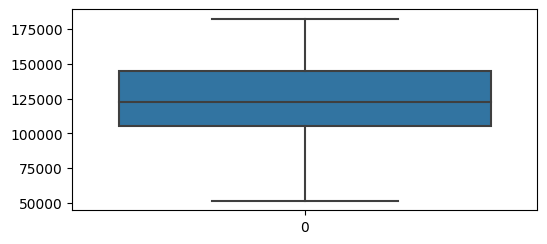

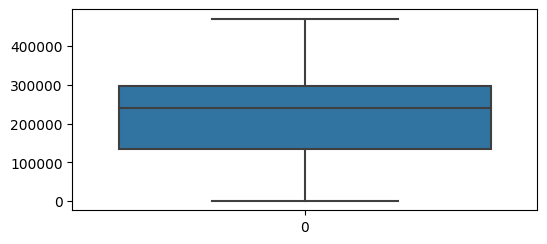

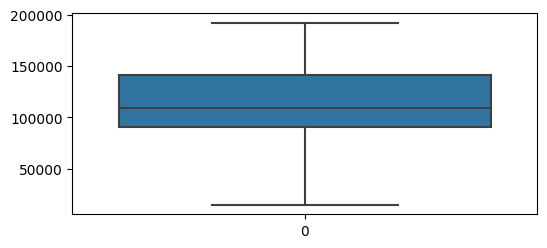

In [11]:
names = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
for i,j in enumerate(names):
  plt.figure(figsize=(6,12))
  plt.subplot(4,1,i+1)
  sns.boxplot(df[j])

In [14]:
x = df.iloc[:,0:4]
y = df['Profit']

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [19]:
le = LabelEncoder()
xtrain['State'] = le.fit_transform(xtrain['State'])
xtest['State'] = le.transform(xtest['State'])

In [20]:
xtrain

,R&D Spend,Administration,Marketing Spend,State
12,93863.75,127320.38,249839.44,1
68,65605.48,153032.06,107138.38,2
1,162597.70,151377.59,443898.53,0
15,114523.61,122616.84,261776.23,2
38,20229.59,65947.93,185265.10,2
...,...,...,...,...
3,144372.41,118671.85,383199.62,2
2,153441.51,101145.55,407934.54,1
6,134615.46,147198.87,127716.82,0
27,72107.60,127864.55,353183.81,2


In [22]:
reg_model = Sequential()

In [24]:
reg_model.add(Dense(4, activation='relu'))
reg_model.add(Dense(64, activation='relu'))
reg_model.add(Dense(32, activation='relu'))
reg_model.add(Dense(1, activation='linear'))

In [25]:
reg_model.compile(optimizer='adam',loss='mse')

In [26]:
reg_model.fit(xtrain,ytrain,batch_size=4,epochs=12)

Epoch 1/12
22/22 [==============================] - 2s 3ms/step - loss: 12698383360.0000
Epoch 2/12
22/22 [==============================] - 0s 3ms/step - loss: 4470178304.0000
Epoch 3/12
22/22 [==============================] - 0s 3ms/step - loss: 2002836352.0000
Epoch 4/12
22/22 [==============================] - 0s 2ms/step - loss: 1842007808.0000
Epoch 5/12
22/22 [==============================] - 0s 2ms/step - loss: 1610969216.0000
Epoch 6/12
22/22 [==============================] - 0s 2ms/step - loss: 1371608576.0000
Epoch 7/12
22/22 [==============================] - 0s 2ms/step - loss: 1103063040.0000
Epoch 8/12
22/22 [==============================] - 0s 2ms/step - loss: 857344832.0000
Epoch 9/12
22/22 [==============================] - 0s 2ms/step - loss: 685305472.0000
Epoch 10/12
22/22 [==============================] - 0s 2ms/step - loss: 570208704.0000
Epoch 11/12
22/22 [==============================] - 0s 2ms/step - loss: 513488928.0000
Epoch 12/12
22/22 [==============

In [27]:
ypred = reg_model.predict(xtest)

1/1 [==============================] - 0s 100ms/step


In [28]:
comp = pd.DataFrame(ytest)
comp.columns = ['Actual Value']
comp['Predicted Values'] = ypred

In [29]:
comp

,Actual Value,Predicted Values
36,90708.19,94181.648438
21,111313.02,139020.187500
19,122776.86,21579.662109
98,149759.96,137925.703125
39,81005.76,75306.015625
14,132602.65,151055.125000
102,134307.35,130124.226562
60,111313.02,139020.187500
26,105733.54,116781.492188
81,71498.49,71507.070312
